# Loading Wine Dataset

The entire dataset


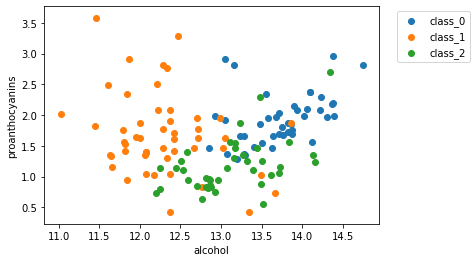

The test data to predict on (useful for comparing incorrect labels)


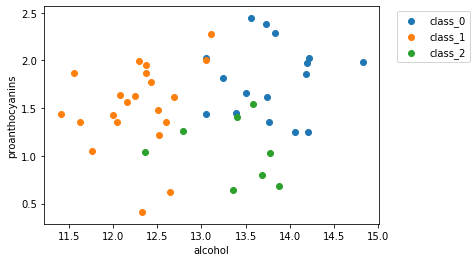

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
X = np.hstack((wine.data[:, 0:1], wine.data[:, 8:9]))
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

wine_names=['class_0','class_1', 'class_2']
for i in range(0, 3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
                marker='o',
                label=wine_names[i])

plt.xlabel('alcohol')
plt.ylabel('proanthocyanins')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

print("The entire dataset")
plt.show()


# Test data to predict on
for i in range(0, 3):
    plt.scatter(X_test[y_test == i, 0],
                X_test[y_test == i, 1],
                marker='o',
                label=wine_names[i])

plt.xlabel('alcohol')
plt.ylabel('proanthocyanins')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

print("The test data to predict on (useful for comparing incorrect labels)")
plt.show()

# K-Nearest Neighbors

Accuracy:  0.7111111111111111


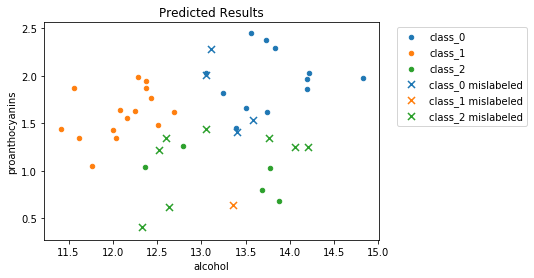

In [2]:
def euclidean_distance(x1, x2):
    sqrsum = 0
    for i in range(0, len(x1)):
        sqrsum += np.square(x1[i]-x2[i])
    return  np.sqrt(sqrsum)
    
def get_neighbors( X_train, y_train, x_test, k, distance= euclidean_distance):
    distances = []
    neighbors = []
    for i in range(0, len(x_test)):
        for j in range(0, len(X_train)):
            distances.append( (j, distance(x_test[i], X_train[j])) )
        distances.sort(key=lambda tup: tup[1])
        nearest = distances[0:k]
        neighbors.append(nearest)
        distances = []
    return neighbors

def knn_predict(X_train, y_train, X_test, y_test, k, distance = euclidean_distance):
    k_labels = np.zeros(len(X_test), dtype = int)
    neighbors = get_neighbors(X_train, y_train, X_test, k, distance)

    label_count = np.zeros(k, dtype = int)
    for a in range(0, len(neighbors)):
        for b in range(0, k):
            label_count[b] = y_train[neighbors[a][b][0]]
        k_labels[a] = np.argmax(np.bincount(label_count))
        label_count.fill(0)
    k_accuracy = np.sum(k_labels == y_test) / len(y_test)
    return (k_labels, k_accuracy)


### Predicting on test data
result = knn_predict(X_train, y_train, X_test, y_test, 5)
print("Accuracy: ", result[1]) 


### Plotting classification results
y_pred = result[0]

X_incorrect = []
y_incorrect = []
X_correct = []
y_correct = []
for i in range(X_test.shape[0]):
    if y_test[i] != y_pred[i]:
        X_incorrect.append(X_test[i])
        y_incorrect.append(y_pred[i])
    else:
        X_correct.append(X_test[i])
        y_correct.append(y_test[i])
X_incorrect = np.array(X_incorrect)
y_incorrect = np.array(y_incorrect)
X_correct = np.array(X_correct)
y_correct = np.array(y_correct)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
wine_names=['class_0', 'class_1', 'class_2']
for i in range(3):
    plt.scatter(X_correct[y_correct == i, 0],
                X_correct[y_correct == i, 1],
                s=20,
                marker='o',
                color = colors[i],
                label=wine_names[i])
    
mislabeled_names=['class_0 mislabeled', 'class_1 mislabeled', 'class_2 mislabeled']
for i in range(3):
    plt.scatter(X_incorrect[y_incorrect == i, 0],
                X_incorrect[y_incorrect == i, 1],
                s=50,
                marker='x',
                color = colors[i],
                label=mislabeled_names[i])

plt.xlabel('alcohol')
plt.ylabel('proanthocyanins')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title("Predicted Results")
plt.show()

# Nearest Centroid

Accuracy:  0.8222222222222222


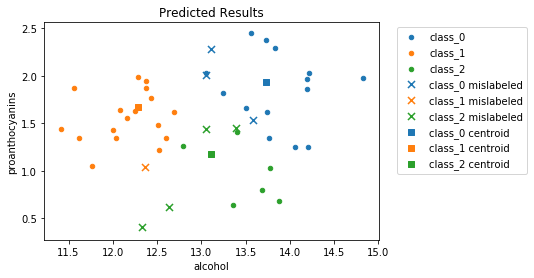

In [3]:
def euclidean_distance(x1, x2):
    sqrsum = 0
    for i in range(0, len(x1)):
        sqrsum += np.square(x1[i]-x2[i])
    return  np.sqrt(sqrsum)

def get_centroids(X, y):
    y_labels = np.unique(y)
    centroids = {}
    for label in y_labels:
        class_data = X[tuple([y == label])]
        class_centroid = np.mean(class_data, axis=0)
        centroids[label] = class_centroid
    return centroids

def knc_predict(X_train, y_train, X_test, y_test, distance = euclidean_distance):
    centroids = get_centroids(X_train, y_train)

    pred_labels = np.zeros(X_test.shape[0], dtype = int)
    for i in range(X_test.shape[0]):
        x = X_test[i]
        nearest_label = 0
        min_distance = np.inf
        for label in centroids:
            dist = distance(x, centroids[label])
            if dist < min_distance:
                nearest_label = label
                min_distance = dist
        pred_labels[i] = nearest_label
                
    k_accuracy = np.sum(pred_labels == y_test) / len(y_test)
    return (pred_labels, k_accuracy, centroids)
      
    
### Predicting on test data
result = knc_predict(X_train, y_train, X_test, y_test)
print("Accuracy: ", result[1])


### Plotting classification results
y_pred = result[0]

X_incorrect = []
y_incorrect = []
X_correct = []
y_correct = []
for i in range(X_test.shape[0]):
    if y_test[i] != y_pred[i]:
        X_incorrect.append(X_test[i])
        y_incorrect.append(y_pred[i])
    else:
        X_correct.append(X_test[i])
        y_correct.append(y_test[i])
X_incorrect = np.array(X_incorrect)
y_incorrect = np.array(y_incorrect)
X_correct = np.array(X_correct)
y_correct = np.array(y_correct)

centroids = result[2]
X_centroid = []
y_centroid = []
for c in centroids:
    X_centroid.append(centroids[c])
    y_centroid.append(c)
X_centroid = np.array(X_centroid)
y_centroid = np.array(y_centroid)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
wine_names=['class_0', 'class_1', 'class_2']
for i in range(3):
    plt.scatter(X_correct[y_correct == i, 0],
                X_correct[y_correct == i, 1],
                s=20,
                marker='o',
                color = colors[i],
                label=wine_names[i])
    
mislabeled_names=['class_0 mislabeled', 'class_1 mislabeled', 'class_2 mislabeled']
for i in range(3):
    plt.scatter(X_incorrect[y_incorrect == i, 0],
                X_incorrect[y_incorrect == i, 1],
                s=50,
                marker='x',
                color = colors[i],
                label=mislabeled_names[i])

centroid_names=['class_0 centroid', 'class_1 centroid', 'class_2 centroid']
for i in range(3):
    plt.scatter(X_centroid[y_centroid == i, 0],
                X_centroid[y_centroid == i, 1],
                marker='s',
                color = colors[i],
                label=centroid_names[i])

plt.xlabel('alcohol')
plt.ylabel('proanthocyanins')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.title("Predicted Results")
plt.show()